In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aqi-ml-data/city_day.csv
/kaggle/input/aqi-data/AirQualityUCI.csv


# <span style="font-family:cursive;text-align:center"> Import library</span>

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import joblib

### **Import dataset**

In [3]:
# convert the data into dataframe
df = pd.read_csv("/kaggle/input/aqi-ml-data/city_day.csv")
# top 5 rows 
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
# bottom 5 rows
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [5]:
print("Total Rows = ", df.shape[0])
print("Total Columns = ", df.shape[1])

Total Rows =  29531
Total Columns =  16


# <span style="font-family:cursive;text-align:center">Exploratory Data Analysis</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>To check shape of the dataframe use .shape() function which return (rows,columns)</b><br>
    📌 &nbsp;<b>To see the name of columns use .columns function which returns name of columns as a list</b><br>
</div>

In [6]:
df.shape

(29531, 16)

In [7]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.info(): datatype of features </b><br>
</div>

In [8]:
# information of dataset feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [9]:
numerical_feature = df.select_dtypes(exclude=object)
print("Numerical Features Names = ", numerical_feature.columns)
print("----------------------------------")
print("Numerical Features Count", len(numerical_feature.columns))

# Discrete numerical feature
discrete_features=[col for col in numerical_feature.columns if len(df[col].unique())<25]
print(" |__ Discrete Numerical Features",len(discrete_features))
# Continous numerical feature
continous_features =  [ col for col in numerical_feature.columns if col not in discrete_features]
print(" |__ Continous Numerical Features",len(continous_features))
print("----------------------------------")
# Categorical Features
categorical_features= df.select_dtypes(include=object)
print("Categorical Features",len(categorical_features.columns))

Numerical Features Names =  Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')
----------------------------------
Numerical Features Count 13
 |__ Discrete Numerical Features 0
 |__ Continous Numerical Features 13
----------------------------------
Categorical Features 3


In [10]:
categorical_features = df.select_dtypes(include=object)
print("Categorical Feature Names =", categorical_features.columns)

Categorical Feature Names = Index(['City', 'Date', 'AQI_Bucket'], dtype='object')


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
Dataset have 
    
- 13 Numerical features Column, 
    
    0 Discreate Numerical features Column,  
    
    13 Continous Numerical features Column
    
- 3 Categorical feature Column name: 'City', 'Date', 'AQI_Bucket'

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.describe(): statistical representation of the dataset</b><br>
</div>

In [11]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.isna(): Detecting missing values.</b><br>
</div>

In [12]:
df.isna().sum().sort_values(ascending=False)

Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
City              0
Date              0
dtype: int64

In [13]:
column_with_null = df.columns[df.isnull().any()]
total_column_with_null = len(column_with_null)

print("Total columns that have at least one null column = ", total_column_with_null)

Total columns that have at least one null column =  14


In [14]:
grouped_df = df.groupby(['City']).size().reset_index(name = "Count")
grouped_df

,City,Count
0,Ahmedabad,2009
1,Aizawl,113
2,Amaravati,951
3,Amritsar,1221
4,Bengaluru,2009
5,Bhopal,289
6,Brajrajnagar,938
7,Chandigarh,304
8,Chennai,2009
9,Coimbatore,386


In [15]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Dataset have 
    
    14/16 columns have null values 

In [16]:
def missing_val_column(df):
    missing = pd.DataFrame(round((df.isna().sum().sort_values(ascending=False) / df.shape[0]) * 100, 2), columns=['% Missing'])
    return missing

missing_val_df = missing_val_column(df)
missing_val_df

,% Missing
Xylene,61.32
PM10,37.72
NH3,34.97
Toluene,27.23
Benzene,19.04
AQI,15.85
AQI_Bucket,15.85
PM2.5,15.57
NOx,14.17
O3,13.62


In [17]:
missing_val_col = missing_val_df[missing_val_df["% Missing"] > 15]
missing_col = missing_val_col.index.tolist()
print(f"{len(missing_col)} Columns that have more than 15% null values: {missing_col}")

8 Columns that have more than 15% null values: ['Xylene', 'PM10', 'NH3', 'Toluene', 'Benzene', 'AQI', 'AQI_Bucket', 'PM2.5']


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* 8 columns name that have more than 15% null values 'Xylene', 'PM10', 'NH3', 'Toluene', 'Benzene', 'AQI', 'AQI_Bucket', 'PM2.5'

In [18]:
df['AQI'].nunique()

829

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* In AQI column there are 829 unique attribute 

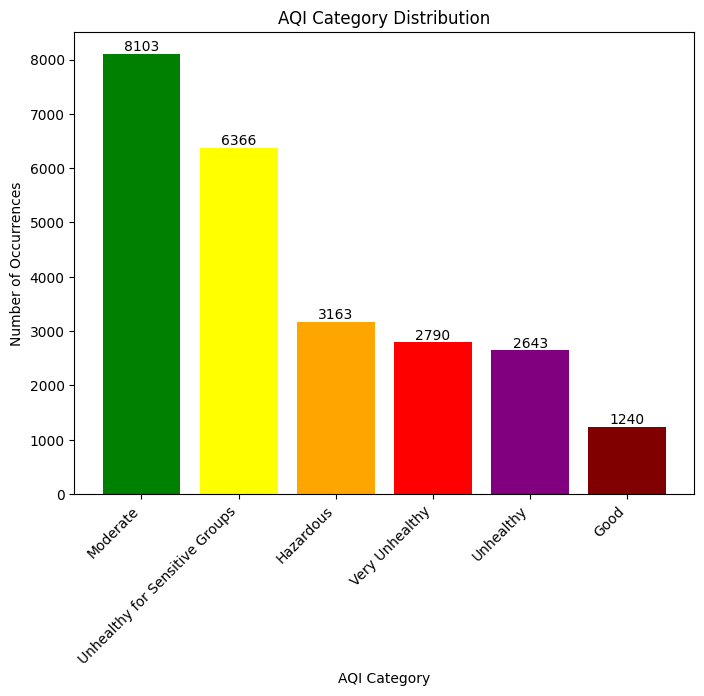

In [19]:
# Define the AQI ranges and corresponding categories
aqi_ranges = [0, 50, 100, 150, 200, 300, 500]
categories = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

# Create a new column 'Category' based on the AQI ranges
df['Category'] = pd.cut(df['AQI'], bins=aqi_ranges, labels=categories, right=False)

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Set the chart size
plt.figure(figsize=(8, 6))
plt.xticks(rotation=45, ha='right')

# Plot the bar chart
bars = plt.bar(category_counts.index, category_counts.values, color=['green', 'yellow', 'orange', 'red', 'purple', 'maroon'])
plt.xlabel('AQI Category')
plt.ylabel('Number of Occurrences')
plt.title('AQI Category Distribution')

# Display the value on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, round(yval, 1), ha='center', va='bottom', color='black')
plt.show()


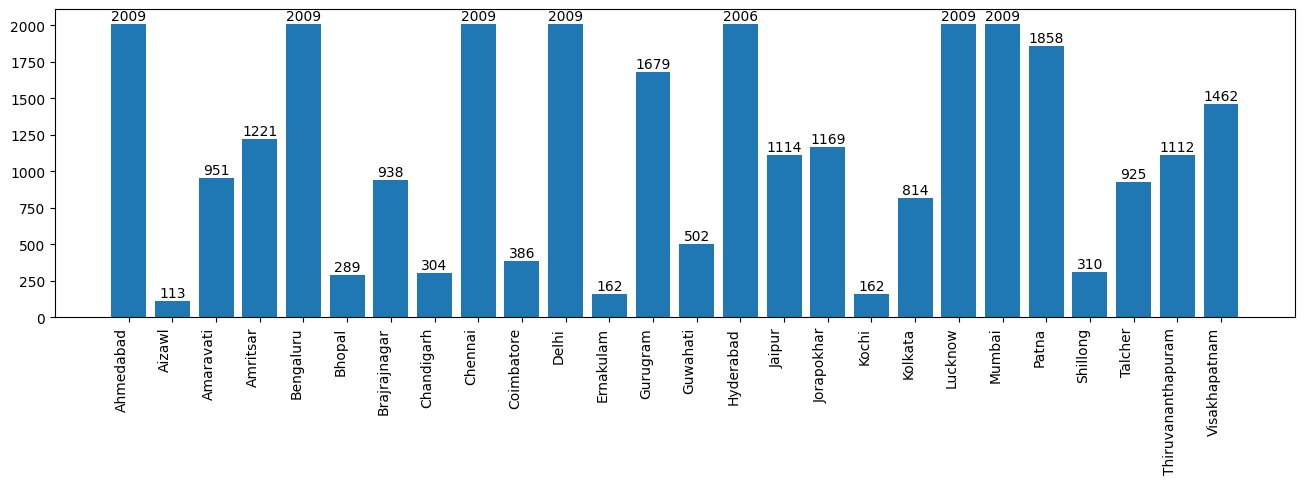

In [20]:
plt.figure(figsize=(16, 4))
plt.xticks(rotation=90, ha='right')
bars = plt.bar(grouped_df['City'], grouped_df['Count'])
# Display the value on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, round(yval, 1), ha='center', va='bottom', color='black')
plt.show()

In [21]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [22]:
# Encoding the author and geometry feature values
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])
df['City'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [23]:
df.sample(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Category
878,0,2017-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11343,10,2018-01-19,253.70,398.16,41.26,49.45,81.11,63.31,1.82,22.27,73.60,5.47,16.52,0.00,451.0,Severe,Hazardous
2510,2,2018-12-17,19.26,22.54,2.00,30.38,17.79,21.15,0.70,10.94,18.91,0.00,0.00,NaN,90.0,Satisfactory,Moderate
11580,10,2018-09-13,27.49,115.88,19.96,23.21,30.78,20.34,0.63,11.24,23.11,1.28,24.60,0.03,108.0,Moderate,Unhealthy for Sensitive Groups
25555,21,2020-01-17,135.89,210.83,31.14,39.22,69.02,26.91,2.07,11.24,18.16,0.83,1.99,1.69,261.0,Poor,Very Unhealthy


<Axes: >

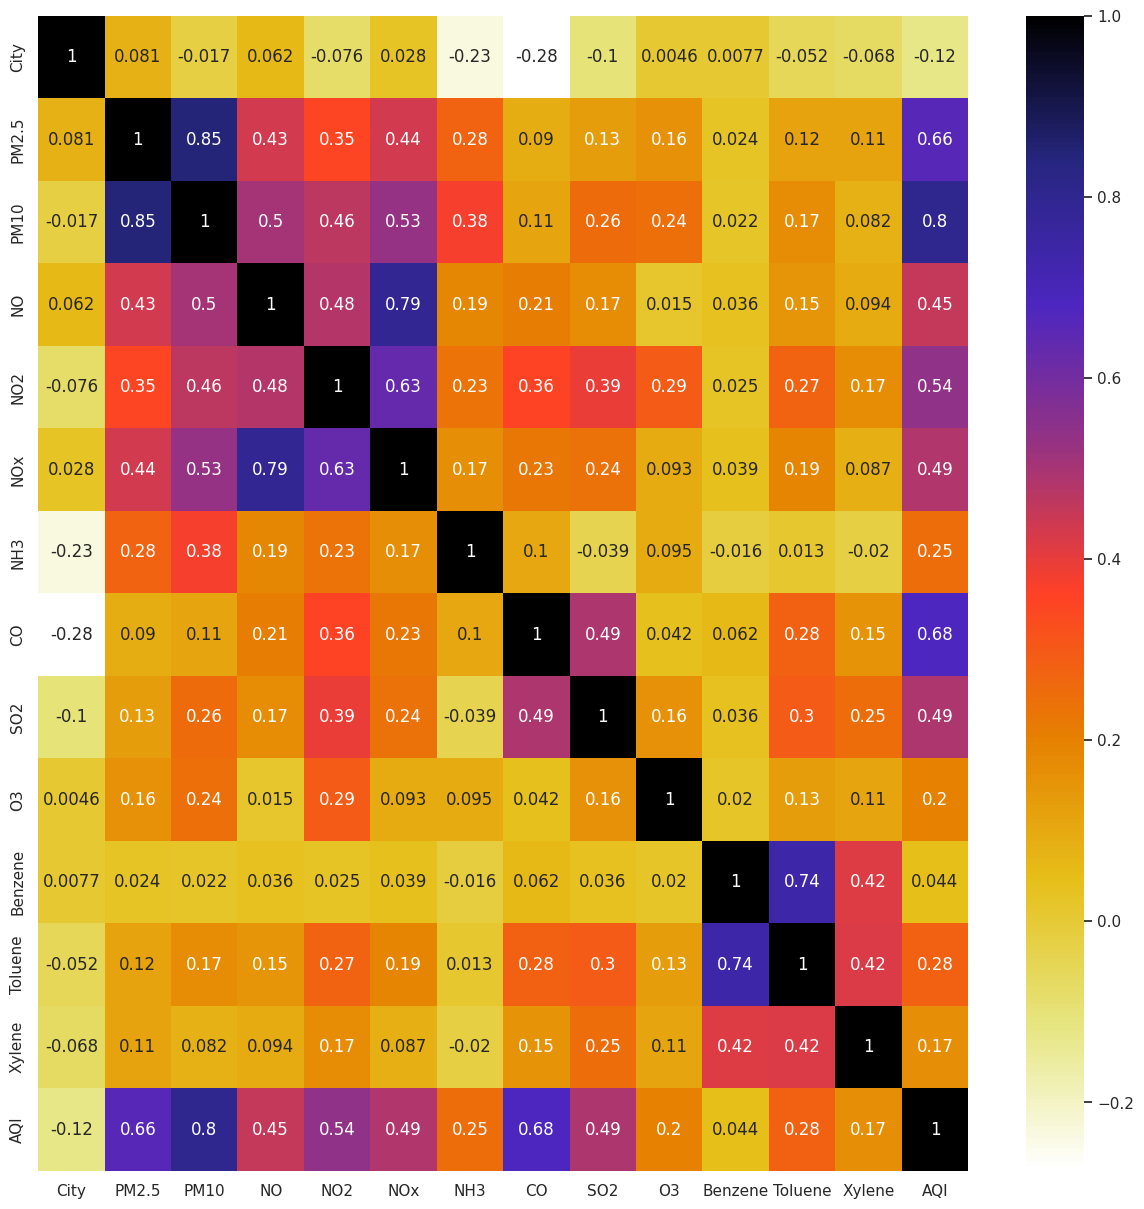

In [24]:
df_heat_map = df.drop(columns=['Date', 'AQI_Bucket', 'Category'], axis=1)
plt.figure(figsize=(15,15))
sns.set()
sns.heatmap(df_heat_map.corr(), annot=True, cmap=plt.cm.CMRmap_r)

# <span style="font-family:cursive;text-align:center">Data Preprocessing</span>

### **Handling Missing Values**

In [25]:
missing_val_df

,% Missing
Xylene,61.32
PM10,37.72
NH3,34.97
Toluene,27.23
Benzene,19.04
AQI,15.85
AQI_Bucket,15.85
PM2.5,15.57
NOx,14.17
O3,13.62


In [26]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
Category       5226
dtype: int64

In [27]:
# Dropping columns having missing values greater than 50% and unecessary columns
df = df.drop(columns=["Xylene", 'Date', "AQI_Bucket", "Category", "NO", "NOx", "NH3", "Benzene", "Toluene"], axis=1)

In [28]:
df.shape

(29531, 8)

In [29]:
df.head()

,City,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,0,NaN,NaN,18.22,0.92,27.64,133.36,NaN
1,0,NaN,NaN,15.69,0.97,24.55,34.06,NaN
2,0,NaN,NaN,19.30,17.40,29.07,30.70,NaN
3,0,NaN,NaN,18.48,1.70,18.59,36.08,NaN
4,0,NaN,NaN,21.42,22.10,39.33,39.31,NaN


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>droping the null values becaouse when we drop null vlaue using mean that increase outlier in the dataset</b><br>
</div>

In [30]:
df1 = df.copy()

# Function to calculate mean of last two digits
def mean_last_two_digits(value):
    if pd.notnull(value) and isinstance(value, int):
        last_two_digits = value % 100  # Extract the last two digits
        return last_two_digits
    return value

# Apply the function to each column
df1 = df1.applymap(mean_last_two_digits)

# Fill NaN values with the mean of the last two digits in each column
df1 = df1.fillna(df1.mean())

# If you want to round the mean values to integers
df1 = df1.round().astype(int)

In [31]:
df1.isna().sum()

City     0
PM2.5    0
PM10     0
NO2      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [32]:
df1.head()

,City,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,0,67,118,18,1,28,133,166
1,0,67,118,16,1,25,34,166
2,0,67,118,19,17,29,31,166
3,0,67,118,18,2,19,36,166
4,0,67,118,21,22,39,39,166


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Now there is no null values in dataset 

In [33]:
# Saving the clean data into csv file 
df1.to_csv("clean_AQI_data.csv", index=False)

In [34]:
df1.columns

Index(['City', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

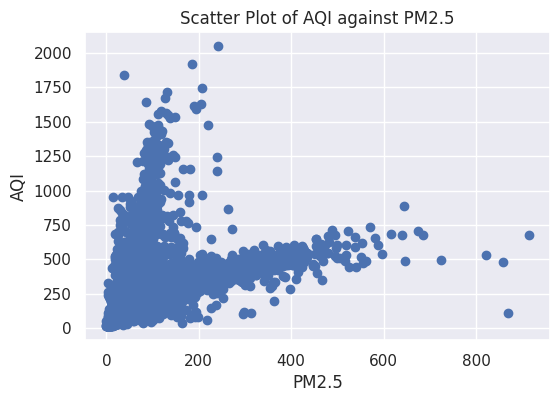

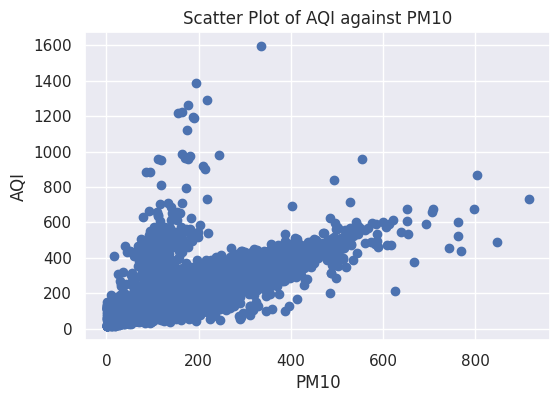

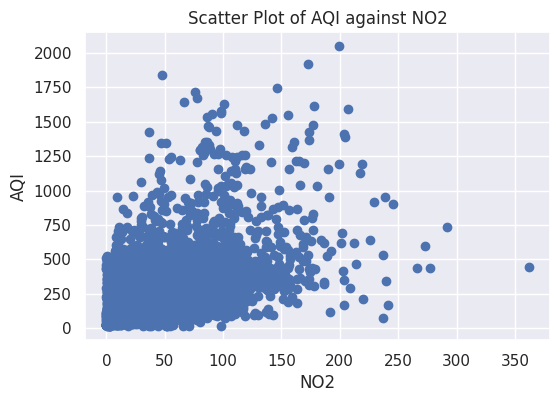

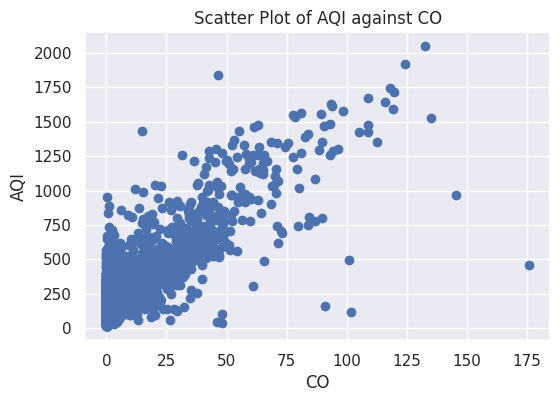

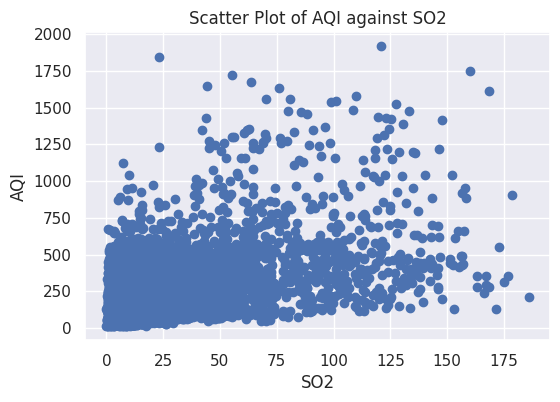

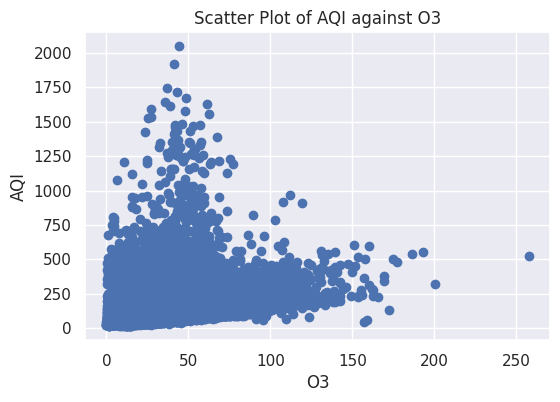

In [35]:
for col in df1.drop(columns = ['AQI', 'City'], axis=1).columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[col], df['AQI'])
    plt.title(f'Scatter Plot of AQI against {col}')
    plt.xlabel(col)
    plt.ylabel('AQI')
    plt.show()

### **Dealing with Outliers**

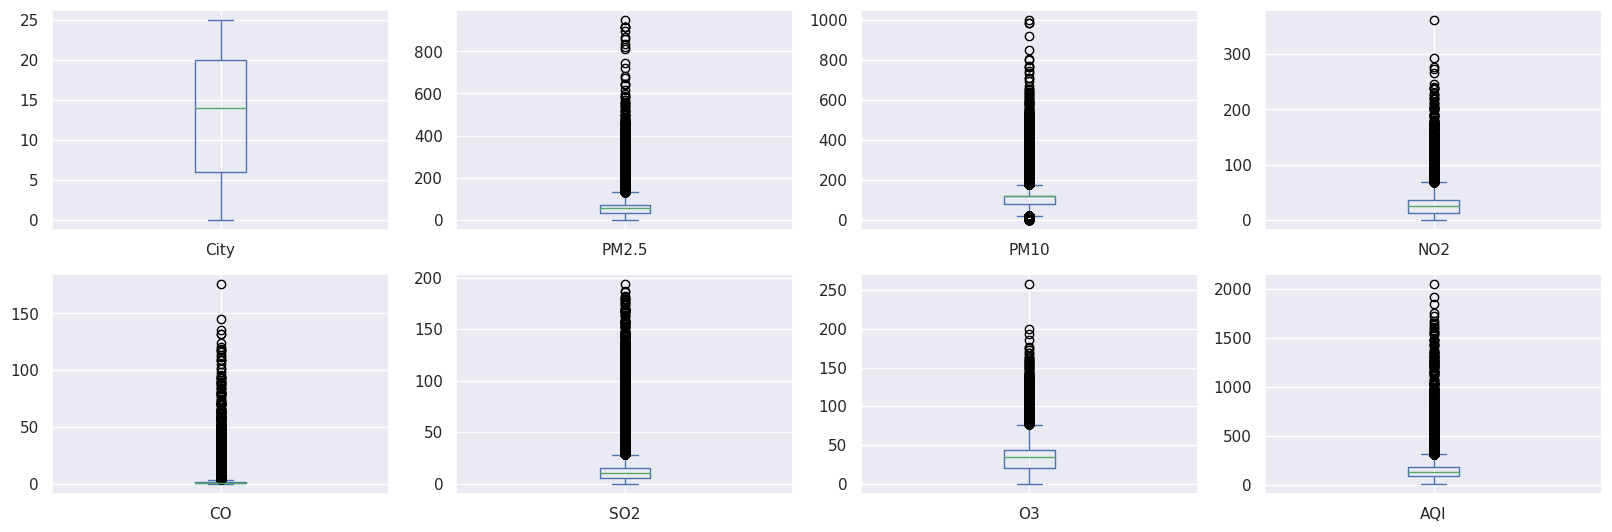

In [36]:
df1.plot(kind="box", 
                vert=True,
                subplots=True, 
                layout = (6,4), 
                figsize=(20,20), 
                sharex=False, 
                sharey=False);

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Almost all feature columns have outlier


In [37]:
for i in df1.columns:
    IQR=df1[i].quantile(0.75)-df1[i].quantile(0.25)
    lower=df1[i].quantile(0.25)-(IQR*1.5)
    upper=df1[i].quantile(0.75)+(IQR*1.5)
    
    outliers=[]
    
    for j in df[i]:
        if j<lower:
            outliers.append(j)
    for k in df[i]:
        if k>upper:
            outliers.append(k)
    print(f'The percentage of outliers in {i}:',(len(outliers)/len(df1)*100),'%')
    

The percentage of outliers in City: 0.0 %
The percentage of outliers in PM2.5: 9.379973587077986 %
The percentage of outliers in PM10: 12.647726118316346 %
The percentage of outliers in NO2: 5.648301784565372 %
The percentage of outliers in CO: 6.826724459043039 %
The percentage of outliers in SO2: 9.149707087467407 %
The percentage of outliers in O3: 3.934848125698419 %
The percentage of outliers in AQI: 10.808980393484813 %


In [38]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3-Q1
IQR

City     14.0
PM2.5    40.0
PM10     39.0
NO2      22.0
CO        1.0
SO2       9.0
O3       22.0
AQI      91.0
dtype: float64

In [39]:
df1.shape

(29531, 8)

In [40]:
# Align each DataFrame or Series separately
df1, Q1 = df1.align(Q1, axis=1, copy=False)
df1, Q3 = df1.align(Q3, axis=1, copy=False)
df1, IQR = df1.align(IQR, axis=1, copy=False)

# Apply the condition after aligning
df_iqr = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_iqr.shape

(20611, 8)

### **After removing the outlier**

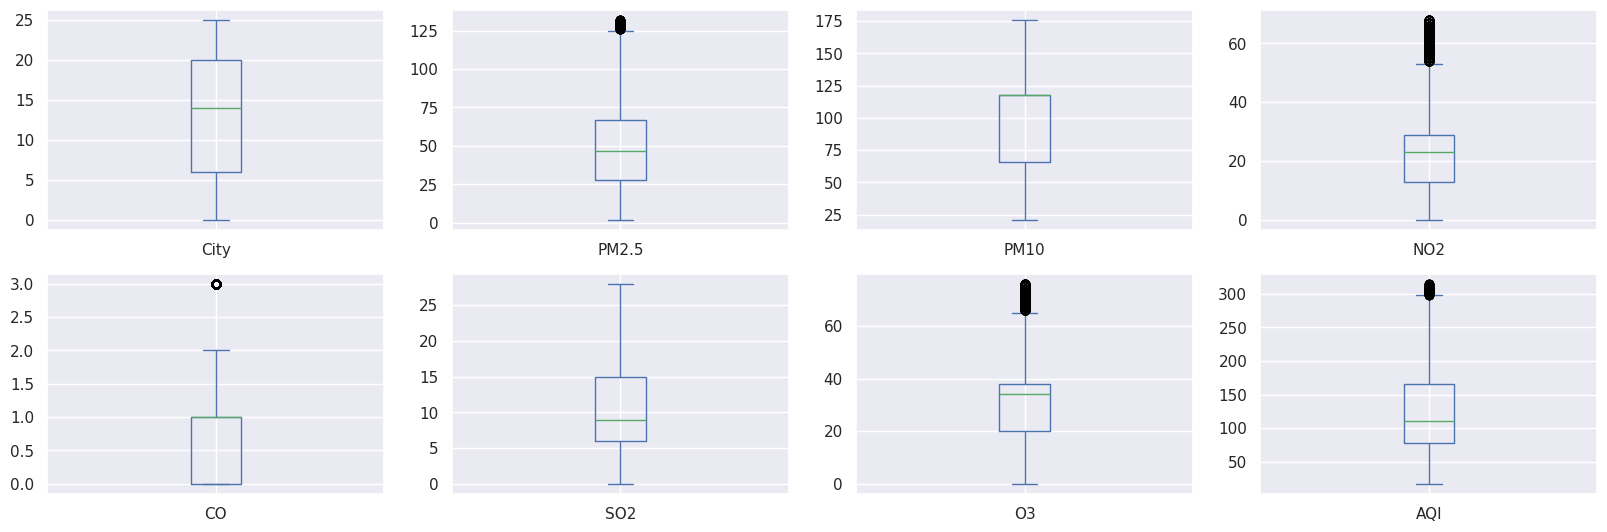

In [41]:
df_iqr.plot(kind="box", 
                vert=True,
                subplots=True, 
                layout = (6,4), 
                figsize=(20,20), 
                sharex=False, 
                sharey=False);

In [42]:
X = df_iqr.drop("AQI", axis =1)
y = df_iqr['AQI']

# <span style="font-family:cursive;text-align:center"> Split Data</span>

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)

In [44]:
# Reset the index for X_train
X_train = X_train.reset_index(drop=True)

# Reset the index for X_test
X_test = X_test.reset_index(drop=True)

# Reset the index for y_train
y_train = y_train.reset_index(drop=True)

# Reset the index for y_test
y_test = y_test.reset_index(drop=True)


In [45]:
X_train.head()

,City,PM2.5,PM10,NO2,CO,SO2,O3
0,24,33,50,4,1,5,39
1,12,38,118,29,0,2,31
2,2,90,148,23,1,21,43
3,3,67,118,29,2,15,34
4,10,41,65,29,3,8,60


In [46]:
print("Shape of X training data: ", X_train.shape)
print("Shape of X test data: ", X_test.shape)

Shape of X training data:  (14427, 7)
Shape of X test data:  (6184, 7)


In [47]:
print("Shape of y training data: ", y_train.shape)
print("Shape of y test data: ", y_test.shape)

Shape of y training data:  (14427,)
Shape of y test data:  (6184,)


# <span style="font-family:cursive;text-align:center"> Feature Engineering</span>

In [48]:
models = {
    "GrandBoostReg": GradientBoostingRegressor(),
    "KNR": KNeighborsRegressor(),
    "rfr": RandomForestRegressor(),
    "XGB": XGBRegressor()  
}

In [49]:
def model_evaluations(models, X_train, X_test, y_train, y_test, params=None):
    r2_dict = dict()
    final_models = dict()
    
    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        final_models[model_name] = model
        
        # Make predictions on unseen data
        y_pred = model.predict(X_test)
        
        # Calculate R2 score with the appropriate average setting
        r2_dict[model_name] = r2_score(y_test, y_pred, multioutput='uniform_average') 

    return r2_dict, final_models

In [50]:
r2_dict, final_models = model_evaluations(models, X_train, X_test, y_train, y_test)

In [51]:
final_models

{'GrandBoostReg': GradientBoostingRegressor(),
 'KNR': KNeighborsRegressor(),
 'rfr': RandomForestRegressor(),
 'XGB': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)}

In [52]:
r2_dict

{'GrandBoostReg': 0.7726814858277852,
 'KNR': 0.747426539531018,
 'rfr': 0.7817219391566148,
 'XGB': 0.7796160110051956}

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Out of all Regressor Algo **Random Forest Regressor** perform best

# <span style="font-family:cursive;text-align:center"> Finalize Model</span>

In [53]:
rfr_model = RandomForestRegressor()

In [54]:
rfr_model.fit(X_train, y_train)

# Make predictions on unseen data
y_pred = rfr_model.predict(X_test)
rfr_r2_score = r2_score(y_test, y_pred)
rfr_r2_score

0.7820216766569739

In [55]:
X_test

,City,PM2.5,PM10,NO2,CO,SO2,O3
0,4,25,39,30,1,7,14
1,24,26,42,5,1,3,34
2,14,38,91,24,0,5,70
3,8,42,118,14,1,9,44
4,9,25,25,66,1,6,42
...,...,...,...,...,...,...,...
6179,12,124,118,45,0,11,61
6180,4,21,45,32,1,3,22
6181,25,13,27,9,0,15,38
6182,25,32,85,43,0,28,9


In [56]:
y_test

0        54
1        68
2       142
3       122
4       166
       ... 
6179    300
6180     64
6181     55
6182     83
6183     85
Name: AQI, Length: 6184, dtype: int64

In [57]:
input_arr = [25,32,85,43,0,28,9]
input_np_arr = np.asarray(input_arr)
reshaped_arr = input_np_arr.reshape((1, -1))
rfr_model.predict(reshaped_arr)

array([93.58])

# <span style="font-family:cursive;text-align:center"> Save model</span>

In [58]:
joblib.dump(rfr_model, "RandomForestRegressorM.joblib")

['RandomForestRegressorM.joblib']